# Scores_comparison

In [1]:
from pandas import read_csv, concat
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from helpers.plots import (
    labels, theme, mean_line, median_line, czy_ma_zostac
)

In [2]:
theme()

In [3]:
g = read_csv('data/cleaned_answers.csv')

### Groups (preparation)

In [4]:
scouts = g[g.is_polish_scout].copy()

In [5]:
not_scouts = g[g.is_polish_scout == False].copy()

In [6]:
scouts_f = scouts[scouts.sex == 'Kobieta']
scouts_m = scouts[scouts.sex == 'Mężczyzna']

In [7]:
not_scouts_f = not_scouts[not_scouts.sex == 'Kobieta']
not_scouts_m = not_scouts[not_scouts.sex == 'Mężczyzna']

In [8]:
dict_is_polish_scout = {
    False: 'Grupa kontrolna',
    True: 'Harcerze'
}

### Differences in score between groups according to sex

#### Scouts females vs scouts males

In [9]:
score_scouts_f = scouts_f['total_score_without_images']
score_scouts_m = scouts_m['total_score_without_images']
mean_score_scouts_f = score_scouts_f.mean()
mean_score_scouts_m = score_scouts_m.mean()
print(
    f'Mean score of females in control group: {round(mean_score_scouts_f, 2)}, ',
    f'mean score of males in control group: {round(mean_score_scouts_m, 2)}'
)

Mean score of females in control group: 23.56,  mean score of males in control group: 23.54


No statistically significant difference between scores of females and males scores among scouts.

#### Control group females vs control group males 

In [10]:
score_not_scouts_f = not_scouts_f['total_score_without_images']
score_not_scouts_m = not_scouts_m['total_score_without_images']
mean_score_not_scouts_f = score_not_scouts_f.mean()
mean_score_not_scouts_m = score_not_scouts_m.mean()
print(
    f'Mean score of females in control group: {round(mean_score_not_scouts_f, 2)}, ',
    f'mean score of males in control group: {round(mean_score_not_scouts_m, 2)}'
)

Mean score of females in control group: 22.28,  mean score of males in control group: 21.85


No statistically significant difference between scores of females and males scores in control group.

In [11]:
stats.mannwhitneyu(
    score_not_scouts_m, score_not_scouts_f,
    use_continuity=False, alternative='two-sided'
)

MannwhitneyuResult(statistic=303493.0, pvalue=0.1706270958206174)

#### Control group vs scouts

There is a statistically significant difference between scores of females scouts and females from control group.

In [12]:
stats.mannwhitneyu(
    score_scouts_f, score_not_scouts_f,
    use_continuity=False, alternative='two-sided'
)

MannwhitneyuResult(statistic=943373.5, pvalue=1.4164678335884803e-17)

There is a statistically significant difference between scores of males scouts and males from control group.

In [13]:
stats.mannwhitneyu(
    score_scouts_m, score_not_scouts_m,
    use_continuity=False, alternative='two-sided'
)

MannwhitneyuResult(statistic=68992.5, pvalue=4.359596268986284e-08)

Mean scores

In [14]:
mean_score_scouts_f, mean_score_scouts_m

(23.56270996640541, 23.53660130718955)

In [15]:
mean_score_not_scouts_f, mean_score_not_scouts_m

(22.27652248150256, 21.848895027624316)

Standard deviation

In [16]:
score_scouts_f.std(), score_scouts_m.std()

(3.143871403415257, 3.3244080283388104)

In [17]:
score_not_scouts_f.std(), score_not_scouts_m.std()

(3.701163322349168, 4.08539712754847)

Median scores

In [18]:
score_scouts_f.median(), score_scouts_m.median()

(24.0, 24.05)

In [19]:
score_not_scouts_f.median(), score_not_scouts_m.median()

(22.8, 22.35)

Mean score in %

In [20]:
scouts_f.score_as_percent.mean(), scouts_m.score_as_percent.mean()

(81.25072402208744, 81.1606941627226)

In [21]:
not_scouts_f.score_as_percent.mean(), not_scouts_m.score_as_percent.mean()

(76.81559476380188, 75.34101733663552)

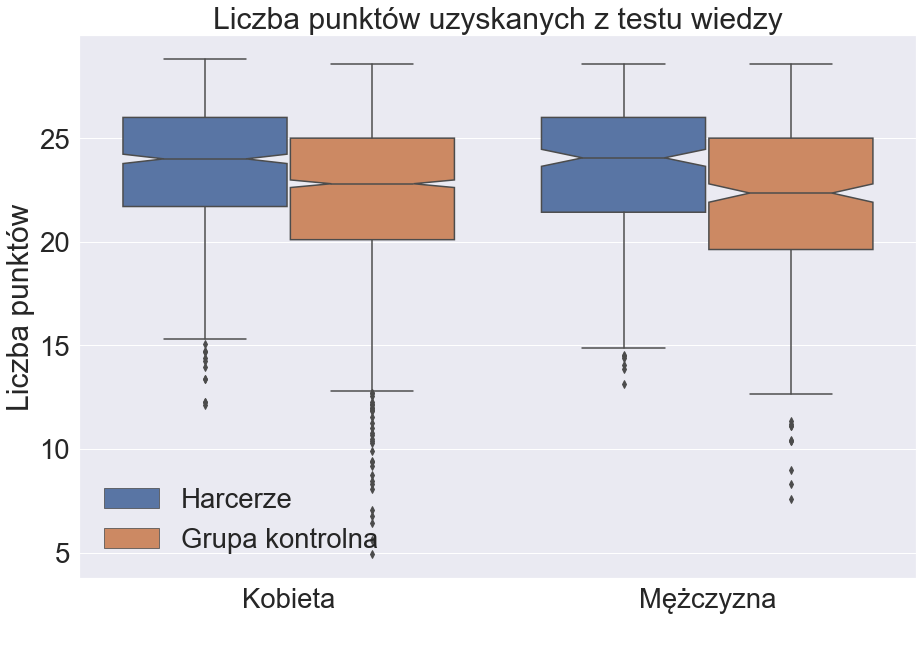

In [22]:
g = g.assign(czy_harcerz=g.is_polish_scout.replace(dict_is_polish_scout))

chart = sns.boxplot(
    x="sex", y="total_score_without_images",
    hue="czy_harcerz", data=g, notch=True
)
labels(
    title='Liczba punktów uzyskanych z testu wiedzy',
    x=' ', y='Liczba punktów', legend=False
)
chart.legend(loc='lower left', frameon=False);

### Participants' knowledge about ticks and tick borne disease
(for all participants)

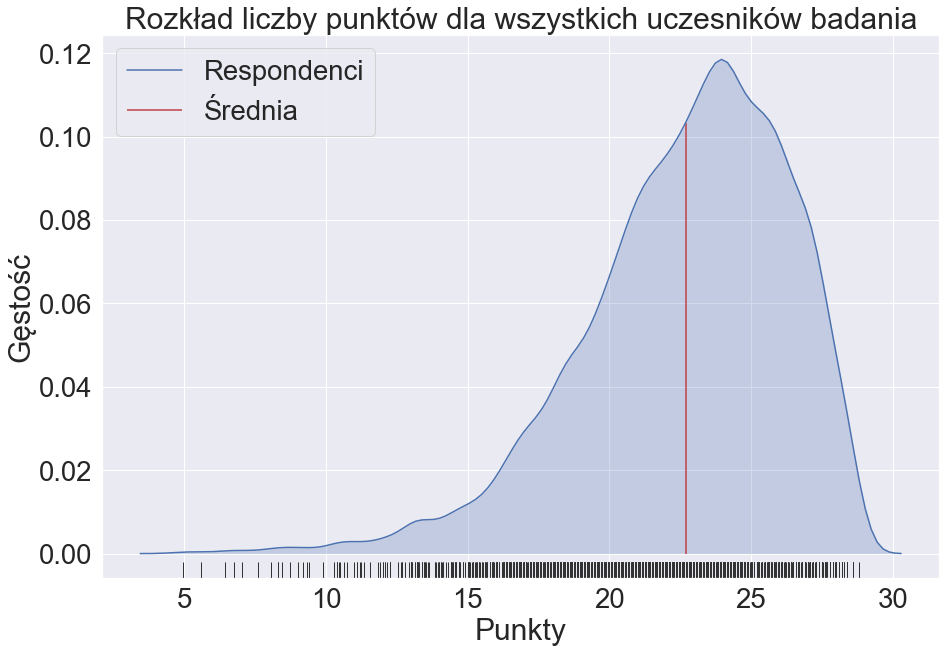

In [23]:
p = sns.kdeplot(g.total_score_without_images, bw=.5, label='Respondenci', shade=True)
sns.rugplot(g['total_score_without_images'], color='.2', height=0.03)
labels(title='Rozkład liczby punktów dla wszystkich uczesników badania', x='Punkty', y='Gęstość', legend=True)
mean_line(p, g.total_score_without_images.mean())

plt.legend()
plt.show()

In [24]:
stats.shapiro(g.total_score_without_images)

(0.9538253545761108, 3.5772119813743387e-31)

In [25]:
mean_score_for_everyone = g.total_score_without_images.mean()
mean_score_for_everyone

22.692239300783598

In [26]:
g.score_as_percent.mean()

78.24910103718483

In [27]:
g.total_score_without_images.median()

23.2

In [28]:
g.score_as_percent.median()

80.0

In [29]:
g.total_score_without_images.std()

3.630638833104596

In [30]:
g[['where_ticks_live', 'where_ticks_live_score']].head()

,where_ticks_live,where_ticks_live_score
0,Na łące;W lesie;W ogrodzie,3/5
1,W parku miejskim;Na łące;W lesie;W ogrodzie,4/5
2,W parku miejskim;Na łące;W lesie;W ogrodzie,4/5
3,W lesie,1/5
4,W lesie,1/5


In [31]:
below_mean_score = g[g.total_score_without_images <= mean_score_for_everyone]
above_mean_score = g[g.total_score_without_images > mean_score_for_everyone]

No participants scored 29 points - highest possible score.

In [32]:
# participants who scored 29 points
max_point_n = 29
g[g.total_score_without_images == max_point_n]

,Unnamed: 0,index,Timestamp,sex,age,place_of_residence,is_polish_scout,scouting_organization,years_in_scouting,is_instructor,...,MIT_waiting_boreliosis_score,MIT_safe_score,MIT_summer_tick_score,MIT_part_tick_score,MIT_city_score,MIT_clock_score,total_score_without_images,total_score_with_images,score_as_percent,czy_harcerz


In [33]:
# % of participants, who had score above the mean
print(max(g.total_score_without_images), max(g.total_score_with_images))

100 * len(above_mean_score) / len(g)

28.8 29.6


55.84689572031344

In [34]:
len(above_mean_score)

1853

### Scores vs studied groups

In [35]:
stats.shapiro(g[g.is_polish_scout].total_score_without_images)

(0.9590879082679749, 7.89899334191079e-18)

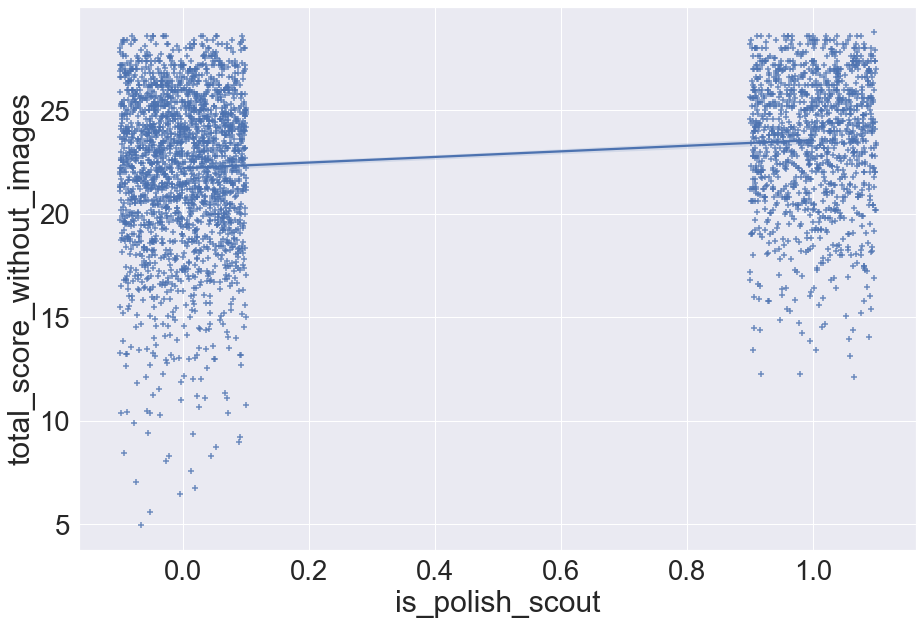

In [36]:
sns.regplot(g.is_polish_scout, g.total_score_without_images, marker='+', x_jitter=0.1);

In [37]:
# check corelations with an artifitial variable "is_scout": 0 lub 1
stats.pearsonr(g.is_polish_scout, g.total_score_without_images)  # efect

(0.1789960479771205, 2.7339099835664345e-25)

In [38]:
stats.spearmanr(g.is_polish_scout, g.total_score_without_images)  # efect

SpearmanrResult(correlation=0.17522713061276926, pvalue=2.743464011365378e-24)

## Scores - considering sex proportions - score_as_percent

In [39]:
gus_2018 = read_csv('data/gus_2018_cleaned.csv')
t = gus_2018[['males', 'females']].apply(sum)
gus_female_male_ratio = t['females'] / t['males']
print(f'GUS women to men ratio: {round(gus_female_male_ratio, 2)}')

GUS women to men ratio: 0.95


In [40]:
zhp_in_numbers = read_csv('data/zhp_2018_cleaned.csv', index_col=0)
zhp_members_total = zhp_in_numbers["Razem:"]

In [41]:
zhp_females = zhp_members_total.loc["Wędr K"] + zhp_members_total.loc["Wędr/Inst K"]
zhp_males = zhp_members_total.loc["Wędr M"] + zhp_members_total.loc["Wędr/Inst M"]
zhp_female_male_ratio = zhp_females / zhp_males
print(f'ZHP women to men ratio: {round(zhp_female_male_ratio, 2)}')

ZHP women to men ratio: 1.45


In [42]:
scouts = g[g.is_polish_scout].sample(frac=1, random_state=0)
no_scouts = g[~g.is_polish_scout].sample(frac=1, random_state=0)

male_scouts_n = len(scouts[scouts.sex == 'Mężczyzna'])
male_n = len(no_scouts[no_scouts.sex == 'Mężczyzna'])

scouts_zhp_ratio = scouts[scouts.apply(
    czy_ma_zostac(
        zhp_female_male_ratio, male_scouts_n
    ), axis='columns'
)]
no_scouts_gus_ratio = no_scouts[no_scouts.apply(
    czy_ma_zostac(
        zhp_female_male_ratio, male_n
    ), axis='columns'
)]

scouts_one_to_one = scouts[scouts.apply(czy_ma_zostac(1, male_scouts_n), axis='columns')]
no_scouts_one_to_one = no_scouts[no_scouts.apply(czy_ma_zostac(1, male_n), axis='columns')]

print(len(scouts_zhp_ratio[scouts_zhp_ratio.is_women]) / len(scouts_zhp_ratio[~scouts_zhp_ratio.is_women]), zhp_female_male_ratio)
print(len(no_scouts_gus_ratio[no_scouts_gus_ratio.is_women]) / len(no_scouts_gus_ratio[~no_scouts_gus_ratio.is_women]), gus_female_male_ratio)

1.4477124183006536 1.4508509017018034
1.4502762430939227 0.9525018147790097


### Scouts achieved better score then control group

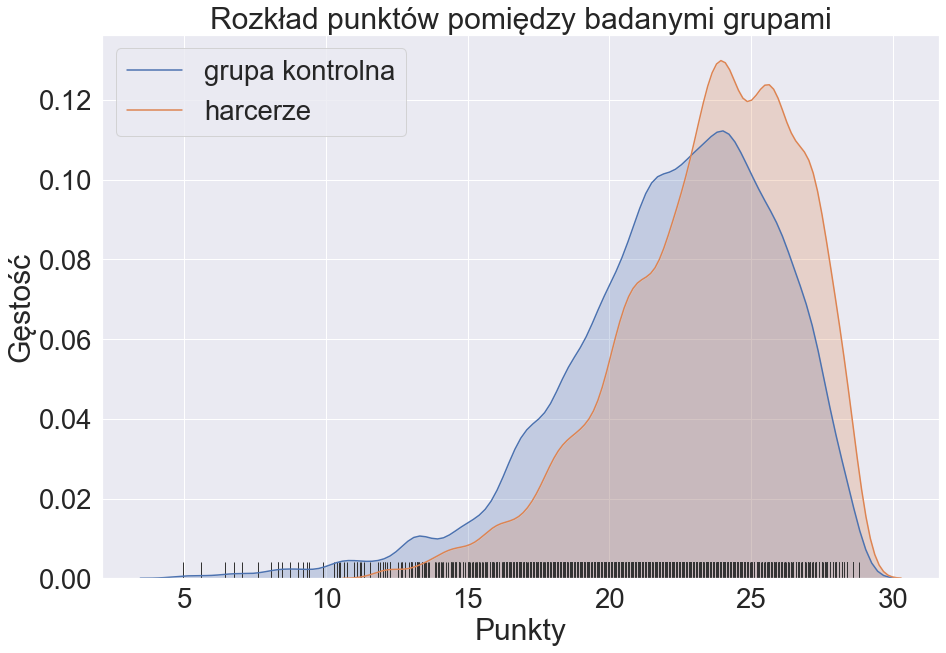

In [43]:
# sns.set_palette("colorblind")
sns.kdeplot(g[g.is_polish_scout == False].total_score_without_images, bw=.5, label="grupa kontrolna", shade=True)
sns.kdeplot(g[g.is_polish_scout].total_score_without_images, bw=.5, label="harcerze", shade=True)
sns.rugplot(g['total_score_without_images'], color='.2', height=0.03)
labels(title='Rozkład punktów pomiędzy badanymi grupami', x='Punkty', y='Gęstość', legend=True)

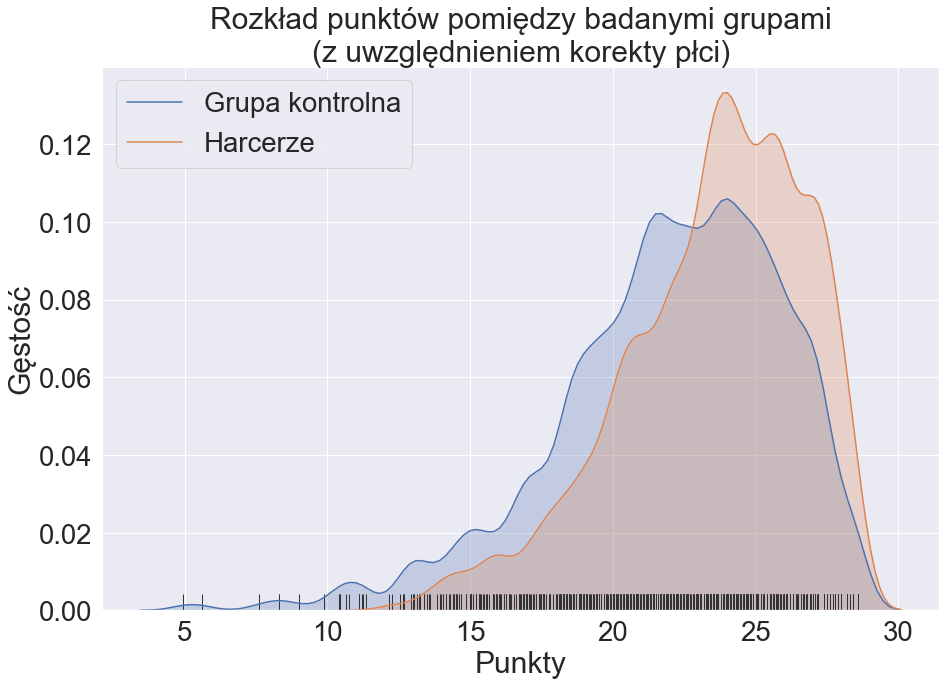

In [44]:
sns.kdeplot(no_scouts_gus_ratio.total_score_without_images, bw=.5, label="Grupa kontrolna", shade=True)
sns.kdeplot(scouts_zhp_ratio.total_score_without_images, bw=.5, label="Harcerze", shade=True)
sns.rugplot(concat([no_scouts_gus_ratio, scouts_zhp_ratio]).total_score_without_images, color='.2', height=0.03)
labels(title='Rozkład punktów pomiędzy badanymi grupami\n(z uwzględnieniem korekty płci)', x='Punkty', y='Gęstość', legend=True)

In [45]:
# Mannwhitneyu after adjusting for sex
stats.mannwhitneyu(
    scouts_zhp_ratio.total_score_without_images,
    no_scouts_gus_ratio.total_score_without_images,
    use_continuity=False,
    alternative='greater'
)

MannwhitneyuResult(statistic=409122.0, pvalue=3.176023186162961e-16)

In [46]:
# Mannwhitneyu with 1:1 sex comparison
stats.mannwhitneyu(
    scouts_one_to_one.total_score_without_images,
    no_scouts_one_to_one.total_score_without_images,
    use_continuity=False,
    alternative='greater'
)

MannwhitneyuResult(statistic=272341.5, pvalue=2.413512603647723e-13)

In [47]:
# Score and percent of test points for scouts and control group
score_scout = scouts_zhp_ratio.total_score_without_images
score_no_scout = no_scouts_gus_ratio.total_score_without_images

# change scores to %
percent_scout = scouts_zhp_ratio.score_as_percent
percent_no_scout = no_scouts_gus_ratio.score_as_percent

#print(score_scout, score_no_scout, percent_scout, percent_no_scout)

In [48]:
print(score_scout.mean(), score_no_scout.head())

23.54833110814419 3050    20.25
2017    22.65
2724    25.20
1756    24.20
241     21.90
Name: total_score_without_images, dtype: float64


In [49]:
print(percent_scout.mean(), percent_scout.std(), percent_scout.median())
#score_scout.value_counts()

81.20114175222142 11.132517766674455 82.75862068965517


In [50]:
print(percent_no_scout.mean(), percent_no_scout.std(), percent_no_scout.median())

75.90055592271504 13.557973155885756 77.58620689655173


In [51]:
# percen points
percent_scout.mean() - percent_no_scout.mean()

5.300585829506375

In [52]:
# difference of means
print(f'Scouts had on avarage {round((percent_scout.mean() / percent_no_scout.mean() * 100) - 100, 2)}% higher score then control group.')

Scouts had on avarage 6.98% higher score then control group.
